## <center>Regression<center>

Regression is the process of adjusting model parameters to fit a prediction $\hat{y}$ to measured values $y$. There are independent variables $x$ as inputs to the model to generate the predictions $\hat{y}$. For machine learning, the objective is to minimize a loss function by adjusting model parameters. A common loss function is the sum of squared errors between the predicted $\hat{y}$ and measured $y$ values.

- $x$ = Independent Variable, Input, Feature
- $\hat{y}$ = Dependent Variable, Output, Label
- $y$ = Output Measurement


The  objective is to minimize a loss function such as a sum of squared errors between the measured and predicted values:

$$Loss = \sum_{i=1}^{n}\left(\hat{y_i} - y_i\right)^2$$

where $n$ is the number of observations. Regression requires labelled data (output values) for training. Classification, on the other hand, can either be supervised (with $y$ measurements, labels) or unsupervised (no labels, $y$ measurements). Run the following code to load 30 sample data points with input $x$ and measured output $y$. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy.optimize import curve_fit

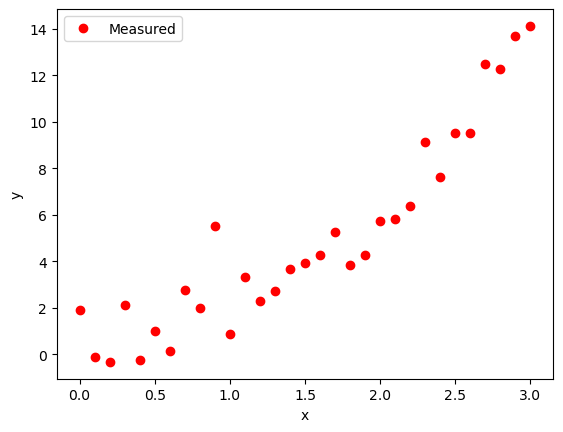

In [2]:
n = 31
x = np.linspace(0,3,n)
y = np.array([1.89,-0.12,-0.32,2.11,-0.25,1.01,0.17,2.75,2.01,5.5,\
     0.87,3.31,2.29,2.73,3.67,3.92,4.29,5.27,3.85,4.26,\
     5.75,5.82,6.36,9.13,7.61,9.52,9.53,12.49,12.29,13.7,14.12])
data = pd.DataFrame(np.vstack((x,y)).T,columns=['x','y'])

plt.plot(x,y,'ro',label='Measured')
plt.xlabel('x'); plt.ylabel('y'); plt.legend()
plt.show()

### 1. Linear Regression

There are many model forms such as linear, polynomial, and nonlinear. A familiar linear model is a line with slope $a$ and intercept $b$.

$$y = a x + b$$
    
A simple method for linear regression is with numpy to fit `p=np.polyfit(x,y,1)` and evaluate `np.polyval(p,x)` the model. Run the following code to determine the slope and intercept that minimize the sum of squared errors (least squares) between the predicted $y$ and measured $\hat{y}$ output.

Slope, Intercept:[ 4.22197581 -1.31586694]
R2: 0.8381881600869069


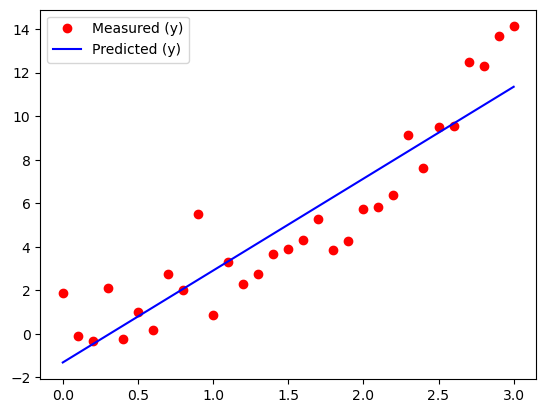

In [3]:
p1 = np.polyfit(x,y,1)
y_hat = np.polyval(p1,x)

R2 = r2_score(y, y_hat)

print('Slope, Intercept:' + str(p1))
print(f"R2: {R2}")

plt.plot(x,y,'ro',label='Measured (y)')
plt.plot(x,y_hat,'b-',label='Predicted (y)')
plt.legend(); plt.show()

Another package is `statsmodels` that performs standard Ordinary Least Squares (OLS) analysis with a nice report summary. The input `x` is augmented with a `np.ones(n)` column so that it also predicts the intercept

```python
xc = np.vstack((x,np.ones(n))).T
```

and this is also accomplished more conveniently with `xc=sm.add_constant(x)`.

In [4]:
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
predictions = model.predict(xc)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     150.2
Date:                Sat, 13 May 2023   Prob (F-statistic):           5.41e-13
Time:                        19:50:12   Log-Likelihood:                -59.683
No. Observations:                  31   AIC:                             123.4
Df Residuals:                      29   BIC:                             126.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3159      0.602     -2.187      0.0

### 2. Polynomial Regression

A polynomial model may also be quadratic:
$$y = a x^2 + b x + c$$
    
A quadratic model is really just a linear model with two inputs $x$ and $z=x^2$.
$$y = a z + b x + c$$
    
This is also called multiple linear regression when there is more than one input $y=f(x,z)$ where $f$ is a function of inputs $x$ and $z$.

[ 1.71448706 -0.92148536  1.1701393 ]
R2: 0.9263740580292408


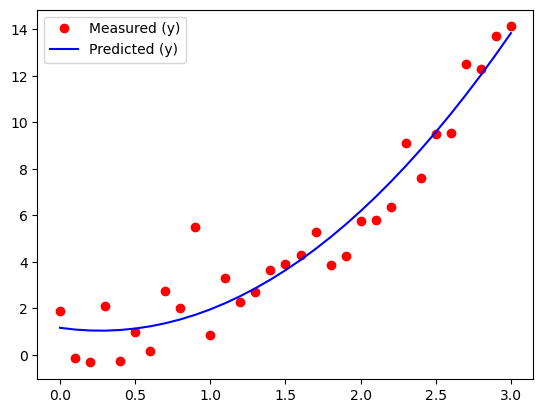

In [5]:
p2 = np.polyfit(x,y,2)
print(p2)

y_hat = np.polyval(p2,x)

R2 = r2_score(y, y_hat)
print(f"R2: {R2}")


plt.plot(x,y,'ro',label='Measured (y)')
plt.plot(x,y_hat,'b-',label='Predicted (y)')
plt.legend(); plt.show()

There is more information on the regressed coefficients for the quadratic fit if you use `statsmodels`.

In [6]:
xc = np.vstack((x**2,x,np.ones(n))).T
model = sm.OLS(y,xc).fit()
predictions = model.predict(xc)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sat, 13 May 2023   Prob (F-statistic):           1.38e-16
Time:                        19:50:12   Log-Likelihood:                -47.478
No. Observations:                  31   AIC:                             101.0
Df Residuals:                      28   BIC:                             105.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.7145      0.296      5.791      0.0

### 3. Nonlinear Regression

Nonlinear regression requires a different tool such as curve_fit that requires a function $f$ that returns a prediction. It also requires the data $x$ and $y$. The unknown parameters $a$ and $b$ are adjusted so that the predicted output matches the measured output $y$.

p = [0.88676183 0.93776713]
R2: 0.9344917213885241


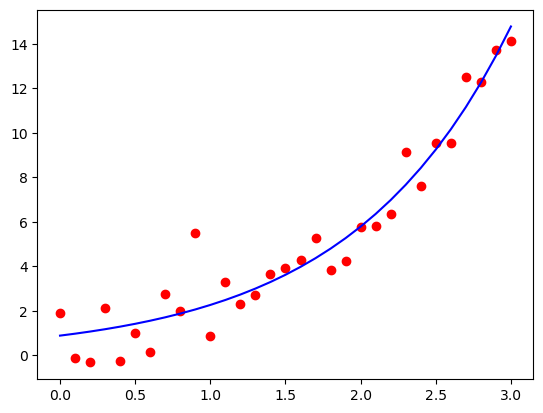

In [7]:
def f(x,a,b):
    return a * np.exp(b*x)
p, pcov = curve_fit(f,x,y)
print('p = '+str(p))

y_hat = f(x,*p)

R2 = r2_score(y, y_hat)
print(f"R2: {R2}")



plt.plot(x,y,'ro')
plt.plot(x,y_hat,'b-')
plt.show()

----
### Machine Learning

Machine learning is computer algorithms and statistical models that rely on patterns and inference. They perform a specific task without explicit instructions. Machine learned regression models can be as simple as linear regression or as complex as deep learning. This tutorial demonstrates several regression methods with `scikit-learn`.

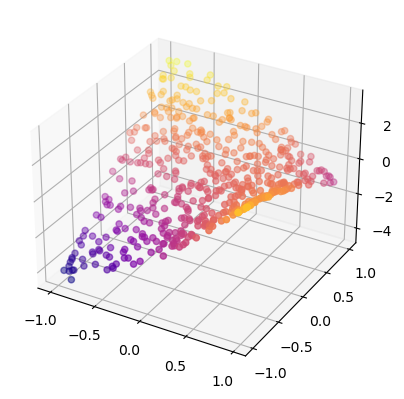

In [8]:
from mpl_toolkits.mplot3d import Axes3D

import math
def f(x,y):
    return 2*math.cos(x)*y + x*math.cos(y) - 3*x*y

n = 500
x = (np.random.rand(n)-0.5)*2.0
y = (np.random.rand(n)-0.5)*2.0
z = np.empty_like(x)
for i in range(n):
    z[i] = f(x[i],y[i])
data = pd.DataFrame(np.vstack((x,y,z)).T,columns=['x','y','z'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c=z,cmap='plasma')
plt.show()

In [9]:
# data splitting into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[["x", "y"]], data["z"], test_size=0.2, shuffle=True)

In [10]:
def fit(method):
    # create points for plotting surface
    xp = np.arange(-1, 1, 0.1)
    yp = np.arange(-1, 1, 0.1)
    XP, YP = np.meshgrid(xp, yp)

    model = method.fit(X_train, y_train)
    zp = method.predict(np.vstack((XP.flatten(),YP.flatten())).T)
    ZP = zp.reshape(np.shape(XP))

    r2 = method.score(X_test, y_test)
    print('R^2: ' + str(r2))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data['x'],data['y'],data['z'],c=z,cmap='plasma',label='data')
    ax.plot_surface(XP, YP, ZP, cmap='coolwarm',alpha=0.7,
                    linewidth=0, antialiased=False)
    plt.show()
    return

#### a. Linear Regression

The simplest regressor is a linear model. As expected, this model doesn't perform very well with the nonlinear data but it does predict the slope of the data.

R^2: 0.5878916467584502


c:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


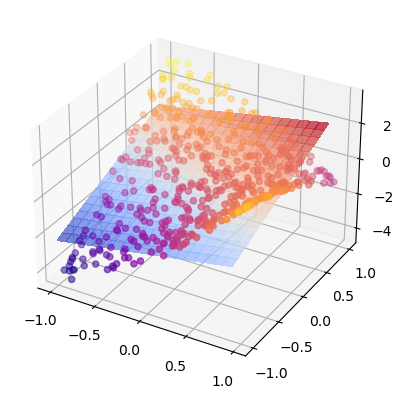

0.10529311824940202

In [11]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
fit(lm)
lm.intercept_

#### b. K-Nearest Neighbors

R^2: 0.9951648640023776


c:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


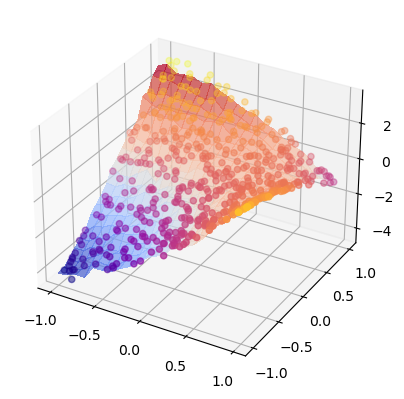

In [12]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
fit(knn)

#### c. Support Vector Regressor

R^2: 0.9969197644939237


c:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


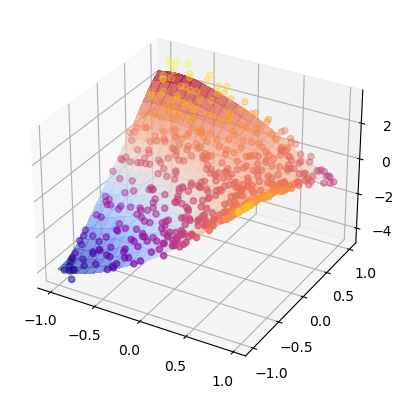

In [13]:
from sklearn import svm
s = svm.SVR(gamma='scale')
fit(s)

#### d. Multilayer Perceptron (Neural Network)

R^2: 0.9963820486443616


c:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


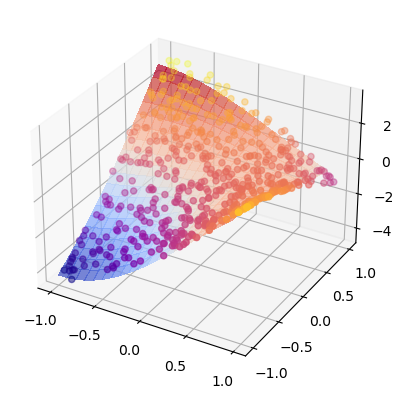

In [14]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(3), 
                  activation='tanh', solver='lbfgs')
fit(nn)

#### e. Decision Tree Regressor

c:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


R^2: 0.984346718244983


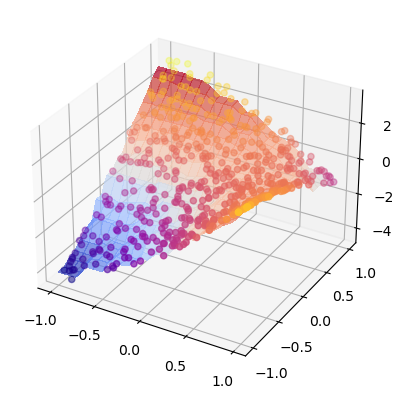

In [15]:
from sklearn import tree
dt = tree.DecisionTreeRegressor()
fit(dt)

#### f. Passive Agressive Regressor

R^2: -0.22753726146478526


c:\Users\Lenovo\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PassiveAggressiveRegressor was fitted with feature names
  warnings.warn(


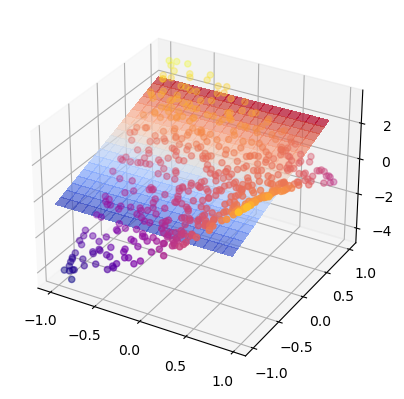

In [16]:
from sklearn.linear_model import PassiveAggressiveRegressor
par = PassiveAggressiveRegressor(max_iter=2000,tol=1e-6)
fit(par)